# Gold Prices Analysis

In this notebook we will be breaking down the gold prices over the past few years and comparing it to different indexes like thr S&P 500 and more. 

In [ ]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

## Load Hisorical Gold Data

In [ ]:
def load_gold_data(path="gold_data_2015_25.csv"):
    """
    Load Gold Prices dataset from CSV file.
    Returns a pandas DataFrame with Date as index.
    """
    df = pd.read_csv(path)

    # Make sure the date column is parsed as datetime
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    return df


# Example usage
gold_df = load_gold_data("gold_data_2015_25.csv")

                    SPX         GLD         USO    SLV   EUR/USD
Date                                                            
2015-01-02  2058.199951  114.080002  159.119995  15.11  1.208941
2015-01-05  2020.579956  115.800003  150.320007  15.50  1.194643
2015-01-06  2002.609985  117.120003  144.399994  15.83  1.193902
2015-01-07  2025.900024  116.430000  146.960007  15.85  1.187536
2015-01-08  2062.139893  115.940002  148.399994  15.64  1.183600


In [13]:
# Explore data
print(gold_df.head())
print(gold_df.describe())
print(gold_df.info())
print(list(gold_df.columns))

                    SPX         GLD         USO    SLV   EUR/USD
Date                                                            
2015-01-02  2058.199951  114.080002  159.119995  15.11  1.208941
2015-01-05  2020.579956  115.800003  150.320007  15.50  1.194643
2015-01-06  2002.609985  117.120003  144.399994  15.83  1.193902
2015-01-07  2025.900024  116.430000  146.960007  15.85  1.187536
2015-01-08  2062.139893  115.940002  148.399994  15.64  1.183600
               SPX          GLD          USO          SLV      EUR/USD
count  2666.000000  2666.000000  2666.000000  2666.000000  2666.000000
mean   3504.231271   158.601665    80.319745    19.414055     1.118508
std    1212.323340    47.245813    27.665948     4.972436     0.052239
min    1829.079956   100.500000    17.040001    11.210000     0.959619
25%    2467.489929   120.650002    67.842497    15.530000     1.083887
50%    3168.685059   154.665001    78.254997    17.415000     1.115219
75%    4373.047607   178.547501    93.279999    

## Identify Gold and Financial Indexes

In [ ]:
gold_col = "GLD"  # Gold prices
index_cols = ["SPX", "USO", "SLV", "EUR/USD"]  # S&P 500, Oil, Silver, Euro/USD

## Normalize the values for comparison

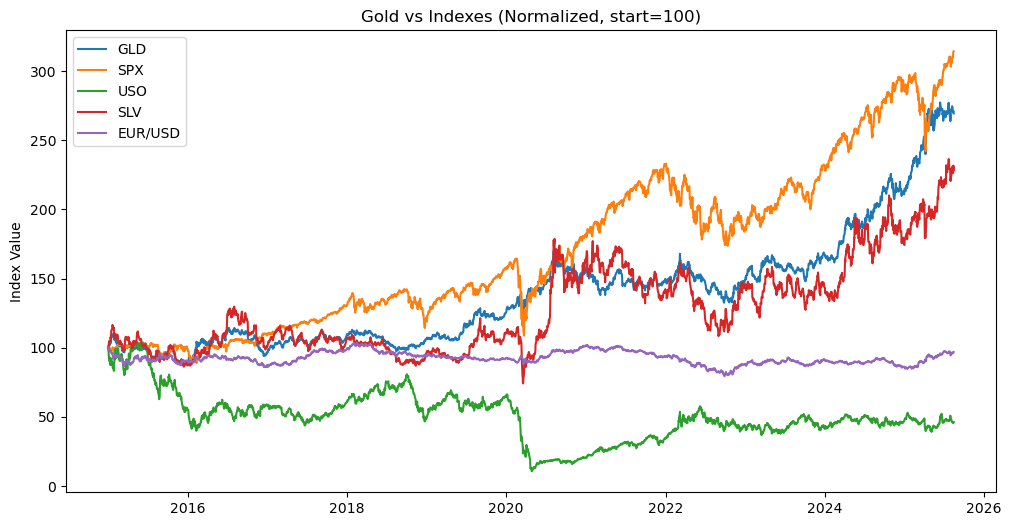

In [ ]:
comp = gold_df[[gold_col] + index_cols].dropna()

normalized = comp / comp.iloc[0] * 100

plt.figure(figsize=(12, 6))
for col in normalized.columns:
    plt.plot(normalized.index, normalized[col], label=col)
plt.title("Gold vs Indexes (Normalized, start=100)")
plt.ylabel("Index Value")
plt.legend()
plt.show()

## Gold Outperforms each index

In [19]:
outperf_counts = {}
for idx in index_cols:
    mask = normalized[gold_col] > normalized[idx]
    outperf_counts[idx] = mask.sum()
print("Days Gold outperformed:")
print(outperf_counts)

Days Gold outperformed:
{'SPX': np.int64(325), 'USO': np.int64(2631), 'SLV': np.int64(1961), 'EUR/USD': np.int64(2645)}


## Annual Returns

In [ ]:
annual = comp.resample("Y").last().pct_change() * 100
annual.index = annual.index.year
annual.round(2)

/var/folders/vk/486jr8ts6gq8qpf704lm_ty00000gn/T/ipykernel_25207/3984363494.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = comp.resample("Y").last().pct_change()*100


,GLD,SPX,USO,SLV,EUR/USD
Date,,,,,
2015,NaN,NaN,NaN,NaN,NaN
2016,8.03,9.54,6.55,14.56,-3.28
2017,12.81,19.42,2.47,5.82,12.92
2018,-1.94,-6.24,-19.57,-9.19,-4.20
2019,17.86,28.88,32.61,14.88,-2.08
2020,24.81,16.26,-67.79,47.30,9.80
2021,-4.15,26.89,64.68,-12.45,-7.93
2022,-0.77,-19.44,28.97,2.37,-5.87
2023,12.69,24.23,-4.94,-1.09,3.82
